<a href="https://colab.research.google.com/github/mattcat1221/Deep-Learning-Analysis/blob/main/AlphabetSoupCharity_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Preprocessing

In [ ]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import pandas as pd
import tensorflow as tf
import numpy as np
from tensorflow.keras.utils import to_categorical
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score


In [ ]:
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [ ]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(columns=['EIN'])

# Display the first few rows to verify the columns have been dropped
application_df.columns



Index(['NAME', 'APPLICATION_TYPE', 'AFFILIATION', 'CLASSIFICATION', 'USE_CASE',
       'ORGANIZATION', 'STATUS', 'INCOME_AMT', 'SPECIAL_CONSIDERATIONS',
       'ASK_AMT', 'IS_SUCCESSFUL'],
      dtype='object')

In [ ]:
application_df.shape

(34299, 11)

In [ ]:
# Determine the number of unique values in each column.
unique_values = application_df.nunique()

# Display the result
print(unique_values)


NAME                      19568
APPLICATION_TYPE             17
AFFILIATION                   6
CLASSIFICATION               71
USE_CASE                      5
ORGANIZATION                  4
STATUS                        2
INCOME_AMT                    9
SPECIAL_CONSIDERATIONS        2
ASK_AMT                    8747
IS_SUCCESSFUL                 2
dtype: int64


In [ ]:
names_df = application_df.NAME.value_counts()

In [ ]:
for name in names_df[names_df<25].index:
    application_df['NAME'] = application_df['NAME'].replace(name, 'Other')

In [ ]:
print(application_df.nunique())

NAME                         4
APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64


In [ ]:
# Look at APPLICATION_TYPE value counts to identify and replace with "Other"
# Get the value counts of the APPLICATION_TYPE column
application_type_counts = application_df['APPLICATION_TYPE'].value_counts()

# Display the value counts
print(application_type_counts)


APPLICATION_TYPE
T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: count, dtype: int64


In [ ]:
# Determine which APPLICATION_TYPE values to replace
# Here, replace categories with fewer than 500 occurrences with "Other"
replace_application_types = application_type_counts[application_type_counts < 500].index

# Replace in DataFrame
application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(replace_application_types, 'Other')

# Display the updated value counts to verify
print(application_df['APPLICATION_TYPE'].value_counts())


APPLICATION_TYPE
T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: count, dtype: int64


In [ ]:
# Look at CLASSIFICATION value counts to identify and replace with "Other"
classification_counts = application_df['CLASSIFICATION'].value_counts()

# Display the value counts
print(classification_counts)


CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: count, Length: 71, dtype: int64


In [ ]:
# Get the value counts of the CLASSIFICATION column
classification_counts = application_df['CLASSIFICATION'].value_counts()

# Filter to display only those with counts greater than 1
classification_counts_filtered = classification_counts[classification_counts > 1]

# Display the filtered value counts
print(classification_counts_filtered)


CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C2400        6
C1720        6
C4100        6
C1257        5
C1600        5
C1260        3
C2710        3
C0           3
C3200        2
C1234        2
C1246        2
C1267        2
C1256        2
Name: count, dtype: int64


In [ ]:
# Get the value counts of the CLASSIFICATION column
classification_counts = application_df['CLASSIFICATION'].value_counts()

# Choose a cutoff value
cutoff_value = 1000

# Create a list of classifications to be replaced
classifications_to_replace = classification_counts[classification_counts < cutoff_value].index.tolist()

# Replace in DataFrame
application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(classifications_to_replace, 'Other')

# Display the updated value counts to verify
print(application_df['CLASSIFICATION'].value_counts())


CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: count, dtype: int64


In [ ]:
# Convert categorical data to numeric with `pd.get_dummies`
application_df_encoded = pd.get_dummies(application_df, dtype="int")

# Display the first few rows of the new DataFrame to verify the conversion
application_df_encoded.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,NAME_Other,NAME_PARENT BOOSTER USA INC,NAME_TOPS CLUB INC,NAME_UNITED STATES BOWLING CONGRESS INC,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,1,108590,1,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,1,5000,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,6692,1,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,1,142590,1,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [ ]:
from sklearn.model_selection import train_test_split

# Assuming 'IS_SUCCESSFUL' is your target column
target = 'IS_SUCCESSFUL'

# Split the preprocessed data into features (X) and target (y) arrays
X = application_df_encoded.drop(columns=[target])
y = application_df_encoded[target]

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting datasets to verify
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (27439, 47)
X_test shape: (6860, 47)
y_train shape: (27439,)
y_test shape: (6860,)


In [ ]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [ ]:
X_train = X_train.astype(int)
y_train = y_train.astype(int)

In [ ]:
print(X_train.dtypes)
print(y_train.dtypes)




STATUS                                     int64
ASK_AMT                                    int64
NAME_Other                                 int64
NAME_PARENT BOOSTER USA INC                int64
NAME_TOPS CLUB INC                         int64
NAME_UNITED STATES BOWLING CONGRESS INC    int64
APPLICATION_TYPE_Other                     int64
APPLICATION_TYPE_T10                       int64
APPLICATION_TYPE_T19                       int64
APPLICATION_TYPE_T3                        int64
APPLICATION_TYPE_T4                        int64
APPLICATION_TYPE_T5                        int64
APPLICATION_TYPE_T6                        int64
APPLICATION_TYPE_T7                        int64
APPLICATION_TYPE_T8                        int64
AFFILIATION_CompanySponsored               int64
AFFILIATION_Family/Parent                  int64
AFFILIATION_Independent                    int64
AFFILIATION_National                       int64
AFFILIATION_Other                          int64
AFFILIATION_Regional

In [ ]:
X_train = X_train.astype(np.float32)
y_train = y_train.astype(np.float32)
print(X_train.dtypes)
print(y_train.dtypes)



STATUS                                     float32
ASK_AMT                                    float32
NAME_Other                                 float32
NAME_PARENT BOOSTER USA INC                float32
NAME_TOPS CLUB INC                         float32
NAME_UNITED STATES BOWLING CONGRESS INC    float32
APPLICATION_TYPE_Other                     float32
APPLICATION_TYPE_T10                       float32
APPLICATION_TYPE_T19                       float32
APPLICATION_TYPE_T3                        float32
APPLICATION_TYPE_T4                        float32
APPLICATION_TYPE_T5                        float32
APPLICATION_TYPE_T6                        float32
APPLICATION_TYPE_T7                        float32
APPLICATION_TYPE_T8                        float32
AFFILIATION_CompanySponsored               float32
AFFILIATION_Family/Parent                  float32
AFFILIATION_Independent                    float32
AFFILIATION_National                       float32
AFFILIATION_Other              

## Compile, Train and Evaluate the Model

In [ ]:
# Define the number of input features
number_input_features = X_train.shape[1]

# Define the number of nodes in each hidden layer
hidden_nodes_layer1 = 80
hidden_nodes_layer2 = 30

# Initialize the Sequential model
nn = tf.keras.models.Sequential()

# Input layer
nn.add(tf.keras.layers.Input(shape=(number_input_features,)))

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, activation='relu'))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation='relu'))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nn.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 80)                  │           3,840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 30)                  │           2,430 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              31 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,301 (24.61 KB)

 Trainable params: 6,301 (24.61 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Define the number of input features
number_input_features = X_train.shape[1]

# Define the number of nodes in each hidden layer
hidden_nodes_layer1 = 80
hidden_nodes_layer2 = 30

# Initialize the Sequential model
nn = tf.keras.models.Sequential()

# Input layer
nn.add(tf.keras.layers.Input(shape=(number_input_features,)))

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, activation='relu'))

# Add dropout after the first hidden layer
nn.add(tf.keras.layers.Dropout(0.2))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation='relu'))

# Add dropout after the second hidden layer (optional)
nn.add(tf.keras.layers.Dropout(0.2))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nn.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 80)                  │           3,840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 80)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 30)                  │           2,430 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 30)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │              31 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,301 (24.61 KB)

 Trainable params: 6,301 (24.61 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compile the model
nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:

# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=100,batch_size=32,validation_data=(X_test, y_test))

Epoch 1/100
858/858 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7095 - loss: 0.5713 - val_accuracy: 0.4659 - val_loss: 62792.3320
Epoch 2/100
858/858 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.7234 - loss: 0.5438 - val_accuracy: 0.5341 - val_loss: 40914.8594
Epoch 3/100
858/858 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7315 - loss: 0.5355 - val_accuracy: 0.5341 - val_loss: 20663.9629
Epoch 4/100
858/858 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7341 - loss: 0.5293 - val_accuracy: 0.4659 - val_loss: 25597.5781
Epoch 5/100
858/858 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7325 - loss: 0.5308 - val_accuracy: 0.5341 - val_loss: 64666.4023
Epoch 6/100
858/858 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7343 - loss: 0.5326 - val_accuracy: 0.5341 - val_loss: 1086.6060
Epoch 7/100
858/858 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7301 - loss: 0.5338 - val_accuracy: 0.5341 - val_loss: 13184.7734
Epoch 8/100
858/858 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.732

In [ ]:
# Import tensorflow
import tensorflow as tf
# Define a custom callback
class AccuracyCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy') >= 0.75: # Changed threshold to 0.75
            print("\nReached 75% accuracy so cancelling training!")
            self.model.stop_training = True

# Create an instance of the callback
accuracy_callback = AccuracyCallback()

# Train the model
fit_model = nn.fit(
    X_train_scaled,
    y_train,
    epochs=50,
batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=[accuracy_callback]
)

    # Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")


Epoch 1/50
858/858 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6807 - loss: 0.6104 - val_accuracy: 0.4659 - val_loss: 17771.5312
Epoch 2/50
858/858 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7192 - loss: 0.5643 - val_accuracy: 0.4659 - val_loss: 97415.2656
Epoch 3/50
858/858 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7254 - loss: 0.5528 - val_accuracy: 0.4659 - val_loss: 2665.4609
Epoch 4/50
858/858 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7274 - loss: 0.5512 - val_accuracy: 0.4659 - val_loss: 45348.0859
Epoch 5/50
858/858 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7300 - loss: 0.5427 - val_accuracy: 0.4659 - val_loss: 24964.8887
Epoch 6/50
858/858 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7322 - loss: 0.5406 - val_accuracy: 0.4656 - val_loss: 63.9936
Epoch 7/50
858/858 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7283 - loss: 0.5431 - val_accuracy: 0.5341 - val_loss: 3758.2654
Epoch 8/50
858/858 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7246 - loss: 0.

In [ ]:
#Adjusting the learning rate
from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.001)
nn.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy']) # Use nn instead of model

In [ ]:
# Compile the model
nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Import ReduceLROnPlateau
from keras.callbacks import ReduceLROnPlateau

# Define the early stopping and learning rate reduction callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10) # Monitor validation loss and stop after 10 epochs with no improvement
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5) # Reduce learning rate by a factor of 0.2 after 5 epochs with no improvement

# Train the model with the settings discussed earlier
fit_model = nn.fit(
    X_train_scaled,
    y_train,
    epochs=7,
    batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping, reduce_lr]
)

# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/7
858/858 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7361 - loss: 0.5349 - val_accuracy: 0.5341 - val_loss: 0.6910 - learning_rate: 0.0010
Epoch 2/7
858/858 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7364 - loss: 0.5297 - val_accuracy: 0.4659 - val_loss: 7076.8887 - learning_rate: 0.0010
Epoch 3/7
858/858 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7341 - loss: 0.5292 - val_accuracy: 0.4659 - val_loss: 6313.0928 - learning_rate: 0.0010
Epoch 4/7
858/858 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7339 - loss: 0.5303 - val_accuracy: 0.4659 - val_loss: 6862.3760 - learning_rate: 0.0010
Epoch 5/7
858/858 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7335 - loss: 0.5313 - val_accuracy: 0.4659 - val_loss: 11107.3281 - learning_rate: 0.0010
Epoch 6/7
858/858 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7387 - loss: 0.5275 - val_accuracy: 0.5341 - val_loss: 0.6910 - learning_rate: 0.0010
Epoch 7/7
858/858 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7323 - loss: 0.5

In [ ]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

215/215 - 0s - 2ms/step - accuracy: 0.7292 - loss: 0.5440
Loss: 0.5440083146095276, Accuracy: 0.7291545271873474


In [ ]:
nn.save('AlphabetSoupCharity_Optimization.h5')

In [ ]:
# Train the model
fit_model = nn.fit(
    X_train_scaled,  # Training data features
    y_train,         # Training data labels
epochs=20,      # Number of times the model will see the entire dataset
batch_size=32,   # Number of samples per gradient update
validation_data=(X_test, y_test)) # Data for validation during training


# Evaluate the model to check if accuracy is at least 75%
final_loss, final_accuracy = nn.evaluate(X_test_scaled, y_test)
print(f"Final Model Accuracy: {final_accuracy:.2%}")

Epoch 1/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7414 - loss: 0.5135 - val_accuracy: 0.4659 - val_loss: 121080.4141
Epoch 2/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7380 - loss: 0.5236 - val_accuracy: 0.4659 - val_loss: 781045.2500
Epoch 3/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7408 - loss: 0.5168 - val_accuracy: 0.5341 - val_loss: 308100.5312
Epoch 4/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7428 - loss: 0.5181 - val_accuracy: 0.5341 - val_loss: 243349.2500
Epoch 5/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7498 - loss: 0.5128 - val_accuracy: 0.4659 - val_loss: 87028.2656
Epoch 6/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7405 - loss: 0.5197 - val_accuracy: 0.4659 - val_loss: 124996.3750
Epoch 7/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7451 - loss: 0.5112 - val_accuracy: 0.4659 - val_loss: 321961.5312
Epoch 8/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7403

In [ ]:
# Define early stopping and learning rate reduction on plateau
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=5,
    min_lr=0.001
)

# Train the model with callbacks
fit_model = nn.fit(
    X_train_scaled,  # Training data features
    y_train,         # Training data labels
    epochs=50,       # Increased number of epochs for more learning time
    batch_size=32,   # Number of samples per gradient update
    validation_data=(X_test, y_test),  # Data for validation during training
    callbacks=[early_stopping, reduce_lr]  # Callbacks for better training
)

# Evaluate the model to check if accuracy is at least 75%
final_loss, final_accuracy = nn.evaluate(X_test_scaled, y_test)
print(f"Final Model Accuracy: {final_accuracy:.2%}")

Epoch 1/50
858/858 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7437 - loss: 0.5160 - val_accuracy: 0.5341 - val_loss: 97945.7656 - learning_rate: 0.0010
Epoch 2/50
858/858 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7408 - loss: 0.5173 - val_accuracy: 0.5341 - val_loss: 59763.9492 - learning_rate: 0.0010
Epoch 3/50
858/858 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7410 - loss: 0.5173 - val_accuracy: 0.4659 - val_loss: 196618.3594 - learning_rate: 0.0010
Epoch 4/50
858/858 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7445 - loss: 0.5119 - val_accuracy: 0.5341 - val_loss: 455106.1875 - learning_rate: 0.0010
Epoch 5/50
858/858 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7421 - loss: 0.5196 - val_accuracy: 0.5341 - val_loss: 529056.5625 - learning_rate: 0.0010
Epoch 6/50
858/858 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7453 - loss: 0.5119 - val_accuracy: 0.5341 - val_loss: 539122.6875 - learning_rate: 0.0010
Epoch 7/50
858/858 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accura

In [ ]:
# Create an instance of the callback
accuracy_callback = AccuracyCallback()

# Train the model
fit_model = nn.fit(
    X_train_scaled,
    y_train,
    epochs=8,
    batch_size=20,
    validation_data=(X_test, y_test),
    callbacks=[accuracy_callback]
)

# Obtain the final accuracy from the training history
final_accuracy = fit_model.history['accuracy'][-1]

print(f"Final Model Accuracy: {final_accuracy:.2%}")

Epoch 1/8
1372/1372 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7421 - loss: 0.5203 - val_accuracy: 0.5341 - val_loss: 9692.2734
Epoch 2/8
1372/1372 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7411 - loss: 0.5188 - val_accuracy: 0.5341 - val_loss: 97582.1875
Epoch 3/8
1372/1372 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7387 - loss: 0.5199 - val_accuracy: 0.5341 - val_loss: 56289.7266
Epoch 4/8
1372/1372 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7411 - loss: 0.5198 - val_accuracy: 0.4659 - val_loss: 277725.5312
Epoch 5/8
1372/1372 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7395 - loss: 0.5213 - val_accuracy: 0.5341 - val_loss: 107402.3672
Epoch 6/8
1372/1372 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7398 - loss: 0.5216 - val_accuracy: 0.5341 - val_loss: 58085.2930
Epoch 7/8
1372/1372 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7336 - loss: 0.5250 - val_accuracy: 0.5341 - val_loss: 83973.9688
Epoch 8/8
1372/1372 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7

In [ ]:
# Create an instance of the callback
accuracy_callback = AccuracyCallback()

# Train the model
fit_model = nn.fit(
    X_train_scaled,
    y_train,
    epochs=8,
    batch_size=20,
    validation_data=(X_test, y_test),
    callbacks=[accuracy_callback]
)

# Obtain the final accuracy from the training history
final_accuracy = fit_model.history['accuracy'][-1]

print(f"Final Model Accuracy: {final_accuracy:.2%}")

Epoch 1/8
1372/1372 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7391 - loss: 0.5222 - val_accuracy: 0.4659 - val_loss: 9201.9980
Epoch 2/8
1372/1372 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7410 - loss: 0.5185 - val_accuracy: 0.5341 - val_loss: 21688.5645
Epoch 3/8
1372/1372 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7412 - loss: 0.5190 - val_accuracy: 0.5341 - val_loss: 24056.5137
Epoch 4/8
1372/1372 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7423 - loss: 0.5163 - val_accuracy: 0.5408 - val_loss: 1006.2880
Epoch 5/8
1372/1372 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7422 - loss: 0.5181 - val_accuracy: 0.5341 - val_loss: 11087.1943
Epoch 6/8
1372/1372 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7416 - loss: 0.5186 - val_accuracy: 0.5341 - val_loss: 33422.0859
Epoch 7/8
1372/1372 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7441 - loss: 0.5158 - val_accuracy: 0.5341 - val_loss: 41687.6328
Epoch 8/8
1372/1372 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7408

In [ ]:
# Create an instance of the callback
accuracy_callback = AccuracyCallback()

# Train the model
fit_model = nn.fit(
    X_train_scaled,
    y_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=[accuracy_callback]
)

# Obtain the final accuracy from the training history
final_accuracy = fit_model.history['accuracy'][-1]

print(f"Final Model Accuracy: {final_accuracy:.2%}")

Epoch 1/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7477 - loss: 0.5121 - val_accuracy: 0.5341 - val_loss: 3811.2827
Epoch 2/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7373 - loss: 0.5187 - val_accuracy: 0.5341 - val_loss: 35111.1484
Epoch 3/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7389 - loss: 0.5235 - val_accuracy: 0.5341 - val_loss: 2189.3623
Epoch 4/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7377 - loss: 0.5201 - val_accuracy: 0.5341 - val_loss: 33254.4336
Epoch 5/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7346 - loss: 0.5242 - val_accuracy: 0.4659 - val_loss: 45740.8359
Epoch 6/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7442 - loss: 0.5158 - val_accuracy: 0.5341 - val_loss: 33258.6602
Epoch 7/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7460 - loss: 0.5138 - val_accuracy: 0.5341 - val_loss: 30342.3496
Epoch 8/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7462 - loss:

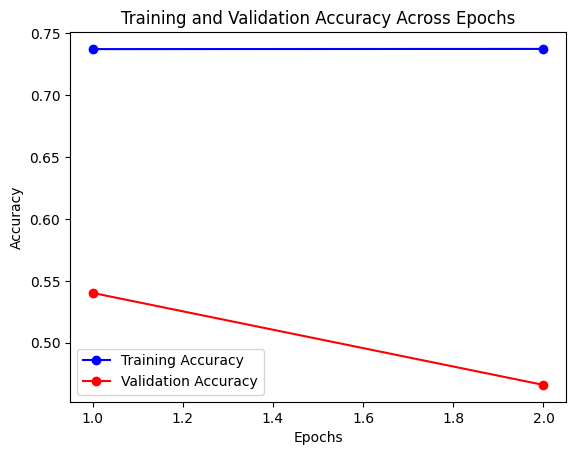

In [ ]:
import matplotlib.pyplot as plt

# Extract the accuracy and validation accuracy from the training history
accuracy = fit_model.history['accuracy']
val_accuracy = fit_model.history['val_accuracy']

# Extract the epochs
epochs = range(1, len(accuracy) + 1)

# Plot the training accuracy
plt.plot(epochs, accuracy, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'ro-', label='Validation Accuracy')

# Set the title and labels
plt.title('Training and Validation Accuracy Across Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

# Display the legend
plt.legend()

# Show the plot
plt.show()